In [1]:
import matplotlib.pyplot as plt
from batteryCell import Cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ESR parameters
R0 = 0.05  # base resistance (Ohms)
RZlist = [[0.01, 10, 1], [0.015, 30, 1]]  # [R, Z, indicator] form

# Create cell instance (nominal)
battery = Cell(chemID="Li-ion", R0=R0, RZlist=RZlist, corner="nom", seed=42)
battery.SoC = [50.0]  # initial state of charge in percentage
battery.SoH = [100.0]  # initial state of health in percentage
battery.voltage = [battery.ocvEstimator.estimateOCV(25,100-battery.SoC[-1])]

# Simulation parameters
time = 0
dt = 50  # 60 seconds per step
total_cycles = 5

# Data logging
time_series = [0]
soc_series = [battery.SoC[-1]]
soh_series = [battery.SoH[-1]]
voltage_series = [battery.voltage[-1]]
current_series = [0]

In [3]:
# Simulate charge/discharge cycles
for cycle in range(total_cycles):
    # Discharge: 2A for 30 minutes
    for _ in range(300):
        time += dt
        battery(time, i=2.0, Temperature=25)
        time_series.append(time)
        soc_series.append(battery.SoC[-1])
        # print( battery.SoC[-1])
        soh_series.append(battery.SoH[-1])
        # print( battery.SoH[-1])
        voltage_series.append(battery.voltage[-1])
        current_series.append(2.0)

    # Charge: -1.5A for 40 minutes
    for _ in range(400):
        time += dt
        battery(time, i=-1.1, Temperature=25)
        time_series.append(time)
        soc_series.append(battery.SoC[-1])
        # print( battery.SoC[-1])
        soh_series.append(battery.SoH[-1])
        # print( battery.SoH[-1])
        voltage_series.append(battery.voltage[-1])
        current_series.append(-1.5)

SoCdegradation called
SoCdegradation called
SoCdegradation called
SoCdegradation called
SoCdegradation called
SoCdegradation called
SoCdegradation called
SoCdegradation called
SoCdegradation called
SoCdegradation called


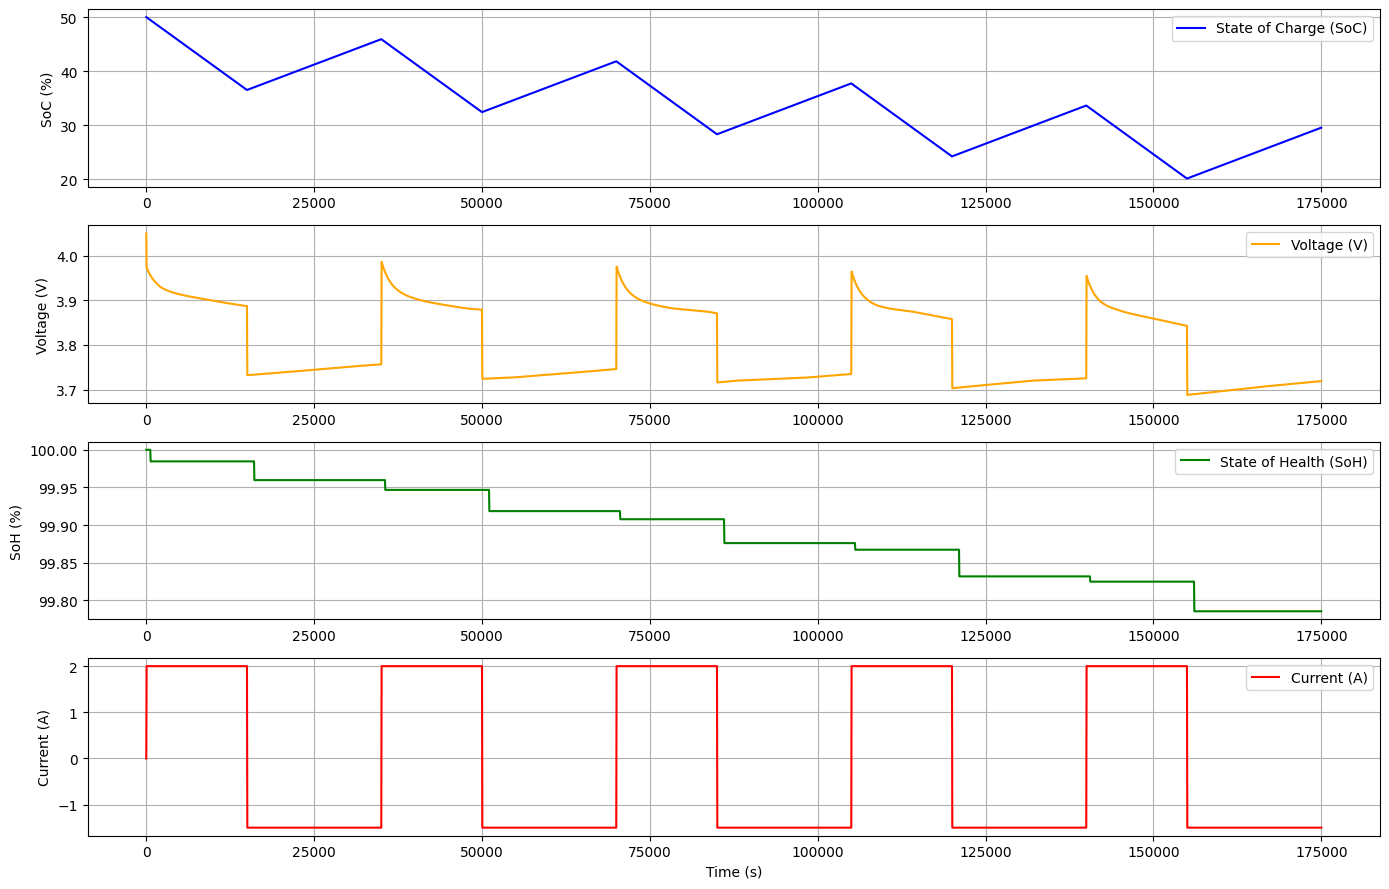

In [4]:
# Plot results
plt.figure(figsize=(14, 9))

plt.subplot(4, 1, 1)
plt.plot(time_series, soc_series, label='State of Charge (SoC)', color='blue')
plt.ylabel("SoC (%)")
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(time_series, voltage_series, label='Voltage (V)', color='orange')
plt.ylabel("Voltage (V)")
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(time_series, soh_series, label='State of Health (SoH)', color='green')
plt.ylabel("SoH (%)")
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(time_series, current_series, label='Current (A)', color='red')
plt.ylabel("Current (A)")
plt.xlabel("Time (s)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

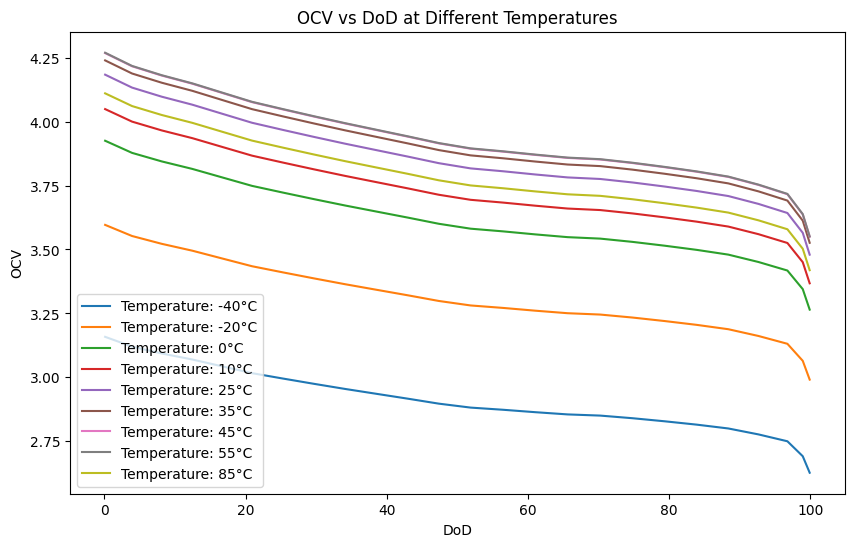

In [5]:
#first column is DoD, rest are ESR values at different temperatures
data = pd.read_csv('Sample_OCV_DoD.csv')
# data = pd.read_csv('Sample_ESR_DoD.csv')
DoD = data.iloc[:, 0].to_numpy()
output_matrix = data.iloc[0:,1:].to_numpy().T
headers=data.columns[1:].to_list()
temperatures=[h.split(' ')[-1][:-1] for h in headers]
ylabel=headers[0].split(' ')[0]
plt.figure(figsize=(10, 6))
for i, temp in enumerate(temperatures):
    #legend=f'Temperature: {temp}°C'
    plt.plot(DoD, output_matrix[i], label=f'Temperature: {temp}°C')
plt.title(f'{ylabel} vs DoD at Different Temperatures')
plt.xlabel(data.columns[0])
plt.ylabel(ylabel)
plt.legend()

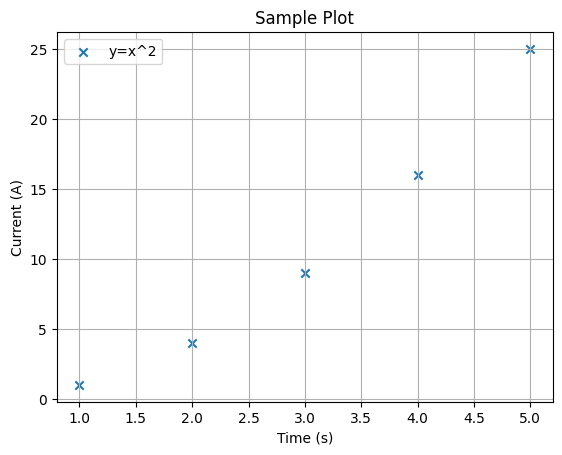

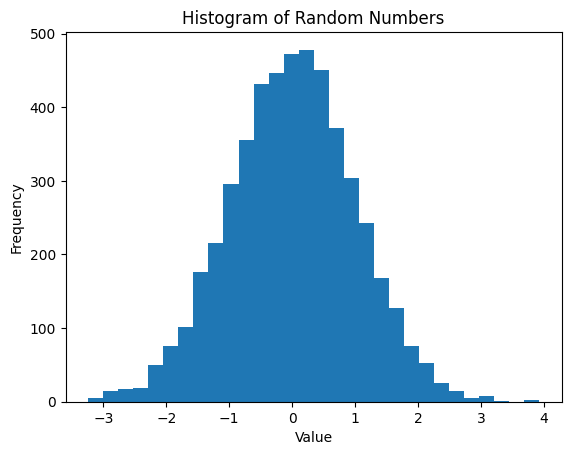

In [6]:
x=[1,2,3,4,5]
y=[1,4,9,16,25]
plt.scatter(x,y,label="y=x^2",marker='x')
plt.grid(True)
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.title("Sample Plot")
plt.legend()
plt.show()
rand=np.random.randn(5000)
plt.hist(rand,bins=30)
plt.title("Histogram of Random Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()